# Delitos ocurridos en el Municipio de Bucaramanga


El siguiente análisis será de utilidad para la Secretaría de Seguridad del Municipio de Bucaramanga y las comisarías de cada barrio, como también para las autoridades de urgencias del Sector de Salud del Municipio.

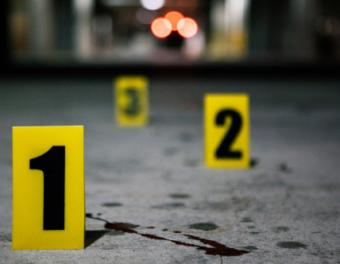


### **Contexto Comercial**

La Secretaría de Seguridad del Municipio de Bucamaranga, necesita analizar según los datos obtenidos en los delítos de su localidad, cuales barrios son los mas peligrosos y que objetos, armas/medios se utilizan con mayor frecuencia. Esto le permitirá tomar medidas preventivas en los barrios mas vulnerables y tratar con estos objetos utilizados en los delitos.

Nos provee datos con información sobre delitos ocurridos entre el año 2015-2021.

A su vez, necesita saber cuantos delitos culminan en lesiones fatales y lesiones no fatales. Esto afectaría a otras áreas en cuanto a presupuesto y planificiación, aparte de a la Secretaría de Seguridad.


### **Definición del objetivo**

También tiene la impresión que en el Barrio "Centro" los delitos se han incrementado en estos años, y necesita saber si esto es correcto y en que mes del año ocurren con más frecuencia".

### **Problema comercial**

Para poder tomar intervención correctamente y poder evaluar programas de seguridad que impliquen acciones preventivas necesita saber que personas son más vulnerables ante hechos delictivos  (si son jovenes, adultos, mayores, infantes) y en qué meses ocurren con más frecuencia.

### **Contexto Analítico**

Los datos recibidos poseen información de los delitos ocurridos, que contienen barrios, fechas, armas utilizadas, tipo de lesiones, información de las victimas, y móvil utilizado entre otros. Los cuales se detallan a continuación:

* ORDEN : número de delito
* ARMAS_MEDIOS : armas/objeto utilizado
* BARRIOS_HECHO : lugar del hecho
* LATITUD : código latitudinal
* LONGITUD : código longitudinal
* ZONA : descripción zonal
* NOM_COMUNA : identificación de comuna
* ANO : año del hecho
* MES : mes del hecho
* DIA : día del hecho
* DIA_SEMANA : día y la semana del hecho
* DESCRIPCION_CONDUCTA : descripción legal del hecho sucedido
* CONDUCTA : conclución del hecho sucedido
* CLASIFICACIONES DELITO : conclución final del daño realizado
* EDAD : edad del usuario
* CURSO_DE_VIDA : descripción de edad del usuario
* ESTADO_CIVIL_PERSONA : estado civil del usuario
* GENERO : género de la victima
* MOVIL_AGRESOR : descripción de movilidad del agresor
* MOVIL_VICTIMA : descripción de movilidad de la víctima



## Se analizará lo siguiente:

- 1) ¿Qué barrios tienen más delitos?

- 2) ¿Cuáles son las armas medios que más se utilizan para cometer delitos?

- 3) ¿Qué tipo de clasificación del delito prevalece?

- 4) ¿Han crecido los delitos en el barrio Centro a través de los años?

- 5) ¿En que etapa de curso de vida son más frecuentes las lesiones fatales?

- 6) ¿Hay alguna relación que refiera al curso de vida de las victimas?

## Se Responden las preguntas

- 1) Se puede ver que CENTRO con 6536 reportes, CABECERA DEL LLANO con 3642 y SAN FRANCISCO 3316 reportes.

- 2) La mayoría de los delitos son cometidos sin empleo de armas, seguido de armas contundentes y arma blancas/cortopunzante.

- 3) La mayoría de los delitos terminan en lesiones no fatales

- 4) Se visualiza una caída de los hechos delictivos en el 2020, con un pico importante de aumento
en el 2021 (cabe recordar que se estaba cursando una etapa de Covid19 en el mundo y pudo
haber impactado en el cometimiento de delitos).
Se puede observar que en el mes de diciembre aumentan significativamente los delitos

- 5) Las lesiones fatales aumentan en la adolescencia y son significativamente mayores en la
etapa de Curso de vida de los Jóvenes.

- 6) Se observa que las variables mas relacionadas a "CURSO_DE_VIDA" son "EDAD", " DESCRIPCION_CONDUCTA" y "GENERO"

# Data Acquisition

**Georreferenciación de los delitos ocurridos en el municipio de Bucaramanga según la modalidad, conducta, móvil del agresor, móvil de la víctima, comunas de ocurrencia, fatales, no fatales y violencia sexual desagregado por curso de vida, sexo, mes y día de ocurrencia. La información se obtuvo de: https://www.datos.gov.co/Seguridad-y-Defensa**

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler

In [3]:
df=pd.read_excel("bucaramangadltos.xlsx")
df.head()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,50946,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,7.153943,-73.136794,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,50947,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,7.116619,-73.109865,URBANA,12. Cabecera del Llano,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,50948,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,7.154916,-73.130231,URBANA,02. Nor Oriental,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,50949,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,7.156274,-73.142024,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,50950,ARMA BLANCA / CORTOPUNZANTE,GAITAN,7.130512,-73.131001,URBANA,04. Occidental,2015,Enero,1,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [4]:
df.shape # posee 76099 filas y 20 columnas

(76099, 20)

In [5]:
df.columns # Se utiliza el df.columns para consultar las columnas del df

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA',
       'NOM_COMUNA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
       'CONDUCTA', 'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

In [6]:
df.info() #se realiza un df.info para averiguar que variables son categóricas y numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76099 entries, 0 to 76098
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ORDEN                   76099 non-null  int64  
 1   ARMAS_MEDIOS            76099 non-null  object 
 2   BARRIOS_HECHO           76099 non-null  object 
 3   LATITUD                 76099 non-null  float64
 4   LONGITUD                76099 non-null  float64
 5   ZONA                    76099 non-null  object 
 6   NOM_COMUNA              76099 non-null  object 
 7   ANO                     76099 non-null  int64  
 8   MES                     76099 non-null  object 
 9   DIA                     76099 non-null  int64  
 10  DIA_SEMANA              76099 non-null  object 
 11  DESCRIPCION_CONDUCTA    76099 non-null  object 
 12  CONDUCTA                76099 non-null  object 
 13  CLASIFICACIONES DELITO  76099 non-null  object 
 14  EDAD                    76099 non-null

In [8]:
df.describe() #df.describe se utiliza para generar estadísticas descriptivas de un df

,ORDEN,LATITUD,LONGITUD,ANO,DIA,EDAD
count,76099.000000,7.609900e+04,7.609900e+04,76099.000000,76099.000000,76099.000000
mean,90886.248216,7.598157e+08,-7.324029e+09,2017.778762,15.486905,35.562189
std,23507.924963,7.278480e+09,7.215111e+10,1.905247,8.790354,14.413018
min,50946.000000,4.590127e+00,-7.317127e+11,2015.000000,1.000000,0.000000
25%,70658.500000,7.107034e+00,-7.313053e+01,2016.000000,8.000000,25.000000
50%,90454.000000,7.119538e+00,-7.312373e+01,2018.000000,15.000000,33.000000
75%,110074.500000,7.132252e+00,-7.311547e+01,2019.000000,23.000000,45.000000
max,132887.000000,7.203123e+10,7.312808e+01,2021.000000,31.000000,95.000000


In [9]:
df.isnull() #esto se utiliza para la averiguación de nulos

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76094,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76095,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76096,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76097,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

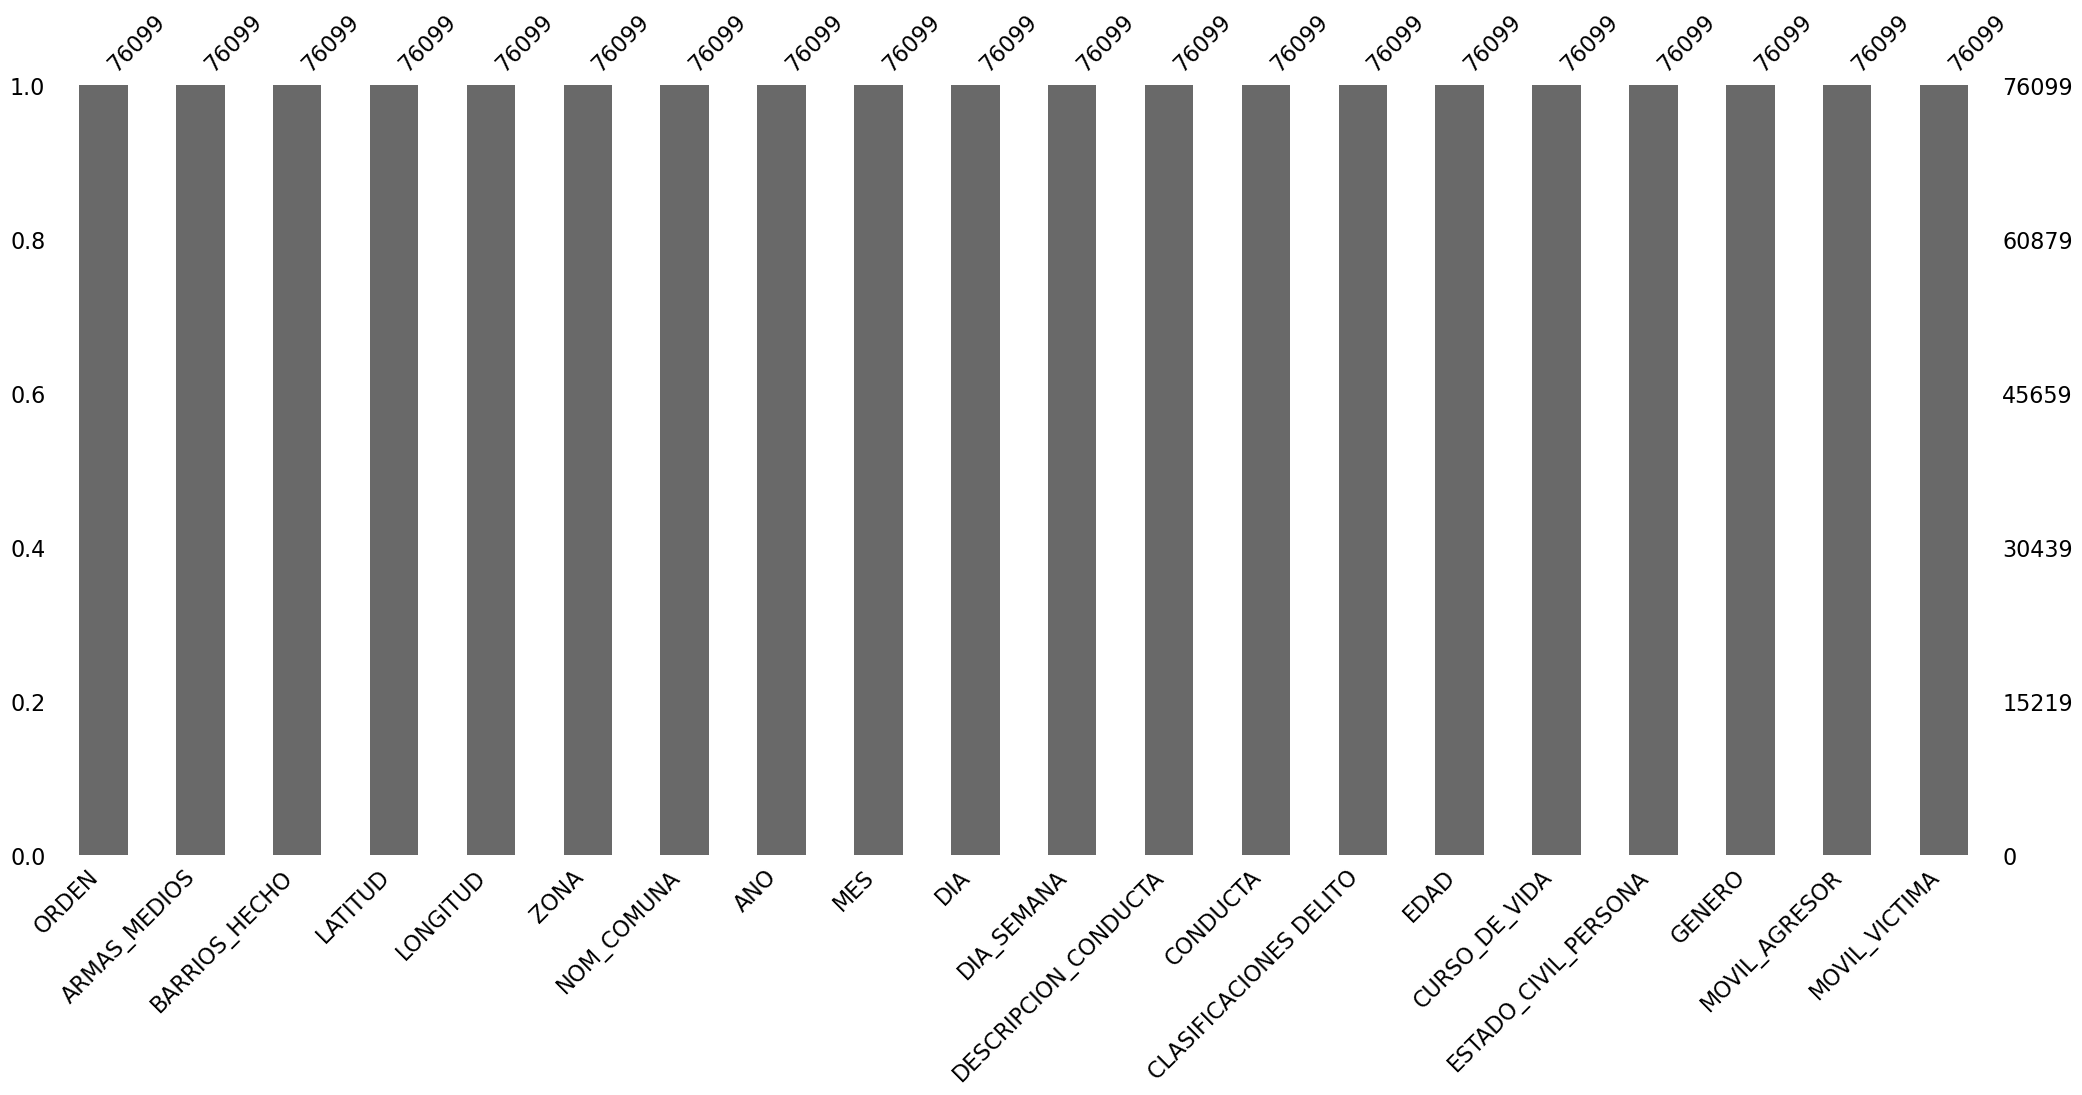

In [9]:
msno.bar(df) #no se encuentran nulos

In [10]:
df2=df.drop_duplicates()
print(df2.shape) # no se encuentran duplicados

(76099, 20)


## Data Wrangling

**1) Se renombra la variable "ANO" por "ANIO."**

**2) Se renombra la variable "CLASIFICACIONES DELITO" por "CLASIFICACIONES_DELITO."**

**3) Se eliminan las columnas "LATITUD","LONGITUD","ORDEN", ya que no me aportarán datos.**

**4) Se convierte la columna "ANIO" a datatime.**

In [11]:
df = df.rename(columns={"ANO": "ANIO"}) #se renombra la variable

In [12]:
df = df.rename(columns={"CLASIFICACIONES DELITO": "CLASIFICACIONES_DELITO"}) #se renombra la variable

In [13]:
df=df.drop(columns=["LATITUD","LONGITUD","ORDEN"]) #se eliminan las columnas, ya que no me aportarán datos

In [14]:
df['ANIO'] = pd.to_datetime(df['ANIO'], format='%Y')

df['ANIO'] = df['ANIO'].dt.year
#se convierte la columna "ANIO" a datatime

### Se Realiza un histograma de la columna "CURSO_DE_VIDA"

- Estos histogramas que muestran la distribución de la variable "EDAD"; para diferentes
categorías de "CURSO_DE_VIDA", así podemos ver donde están ubicadas las víctimas
según edad.

- En los boxplots se han filtrado los valores atípicos, estos gráficos nos muestran la
distribución de la variable "EDAD"; en diferentes categorías de "CURSO_DE_VIDA";

- Podemos observar que que la mayoría de las víctimas están en la edad adulta, aumentan
al llegar a la adolescencia, con un pico significativo llegando a los 60 y disminuye en las
personas mayores.

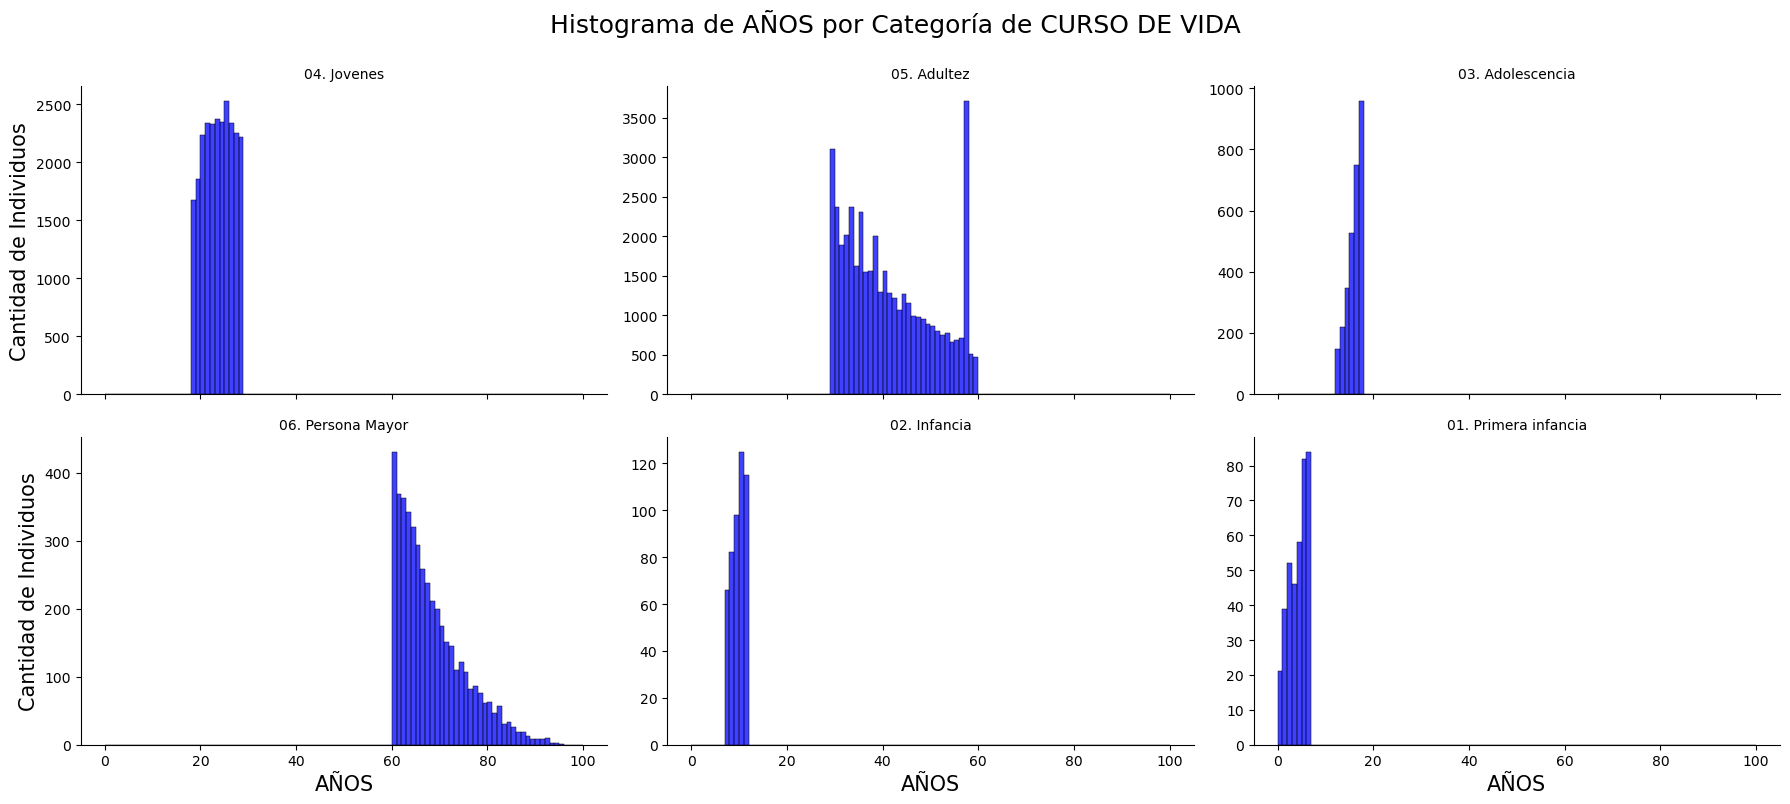

In [148]:
df_seleccion = df[df['CURSO_DE_VIDA'].isin(['01. Primera infancia', '02. Infancia', '03. Adolescencia', '04. Jovenes', '05. Adultez', '06. Persona Mayor'])]

columns = df_seleccion.columns[4:-3]  # Selecciono los parámetros de mi variable.
l = [i for i in columns if i not in ['explicit', 'mode']]

# Crea una cuadrícula de subtramas con histogramas
g = sns.FacetGrid(df_seleccion, col="CURSO_DE_VIDA", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map(sns.histplot, "EDAD", bins=range(101), kde=False, color='blue')

g.set_axis_labels("AÑOS", "Cantidad de Individuos", fontsize=15)
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Histograma de AÑOS por Categoría de CURSO DE VIDA", fontsize=18, y=1)

plt.tight_layout()
plt.show()


### Se Realiza un boxplot de la columna "CURSO_DE_VIDA"

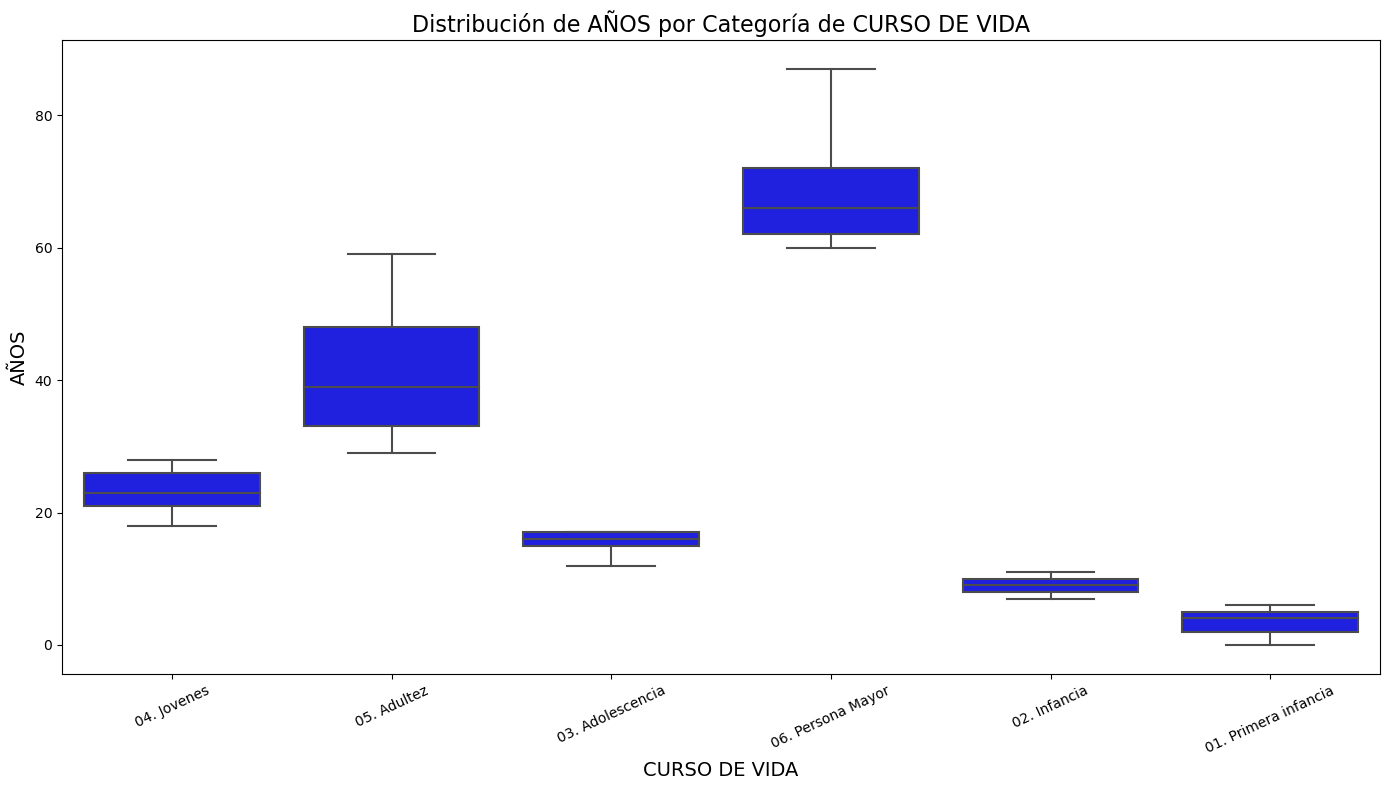

In [124]:
df_seleccion = df[df['CURSO_DE_VIDA'].isin(['01. Primera infancia', '02. Infancia', '03. Adolescencia', '04. Jovenes', '05. Adultez', '06. Persona Mayor'])]

columns = df_seleccion.columns[4:-3]  # Selecciono los parámetros de mi variable.
l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize=(14, 8))

sns.boxplot(data=df_seleccion, y="EDAD", x="CURSO_DE_VIDA", color='blue', showfliers=False)
# Crea un único gráfico de caja utilizando Seaborn. Muestra la distribución de la variable 'ANIO' en diferentes categorías de 'CURSO_DE_VIDA'.

plt.xticks(rotation=25)
plt.xlabel("CURSO DE VIDA", fontsize=14)
plt.ylabel("AÑOS", fontsize=14)
plt.title("Distribución de AÑOS por Categoría de CURSO DE VIDA", fontsize=16)

plt.tight_layout()
plt.show()


## Se responden las preguntas

- ### 1) ¿Qué barrios tienen más delitos?

- Se puede ver que CENTRO con 6536 reportes, CABECERA DEL LLANO con 3642 reportes y SAN FRANCISCO 3316 reportes.

**Se realiza un conteo de hechos por barrio para ver cuales tienen más delitos**

In [16]:
barrios_count = df['BARRIOS_HECHO'].value_counts()
print(barrios_count)


CENTRO                               6536
CABECERA DEL LLANO                   3642
SAN FRANCISCO                        3316
LA CONCORDIA                         2909
SAN ALONSO                           1928
                                     ... 
LA ROSITA                               1
MESETAS DEL SANTUARIO                   1
BELLAVISTA FLORIDA                      1
VRDA  SAN ISIDRO                        1
FACULTAD DE MINAS U. NACIONAL C-7       1
Name: BARRIOS_HECHO, Length: 454, dtype: int64


**Top 10 de barrios con más delitos**

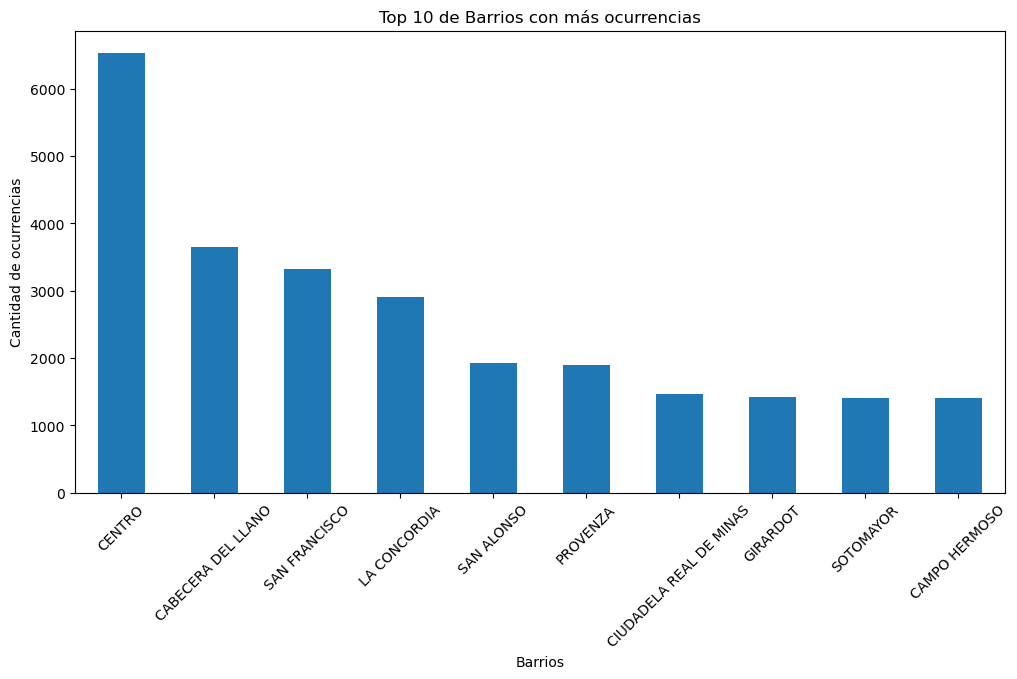

In [17]:
top_10_barrios = barrios_count.head(10)
# Mediante un conteo, se pudo analizar que el "CENTRO" es el lugar con mas delitos notificados.
# se utilizo solo el top 10, ya que son muchos barrios a calcular.

plt.figure(figsize=(12, 6))
top_10_barrios.plot(kind='bar')

plt.xlabel('Barrios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Barrios con más ocurrencias')
plt.xticks(rotation=45)

plt.show()

- ### 2) ¿Cuales son las armas/medios mas utilizadas en los delitos?

- La mayoría de los delitos son cometidos sin empleo de armas, seguido de armas contundentes y arma blancas/cortopunzante.
- Se puede visualizar a continuación un listado con la cantidad de delitos cometidos con las armas/medios nombrados.

**Se realiza un conteo de armas y medios utilizados para cometer los delitos**

In [18]:
armas_count = df['ARMAS_MEDIOS'].value_counts()
print(armas_count)

SIN EMPLEO DE ARMAS                   25648
CONTUNDENTES                          18013
ARMA BLANCA / CORTOPUNZANTE           13898
VEHICULO                               5726
ARMA DE FUEGO                          5201
MOTO                                   3711
LLAVE MAESTRA                          1605
PALANCAS                                971
NO REPORTADO                            508
ESCOPOLAMINA                            243
LLAMADA TELEFONICA                      151
PERRO                                    62
REDES SOCIALES                           50
DIRECTA                                  40
PUNZANTES                                36
ACIDO                                    32
CORTANTES                                26
BICICLETA                                22
ARMA TRAUMATICA                          17
MIXTA                                    13
MEDICAMENTOS                             12
GASES                                    12
COMBUSTIBLE                     

**Se realiza un top 10 de armas medios**

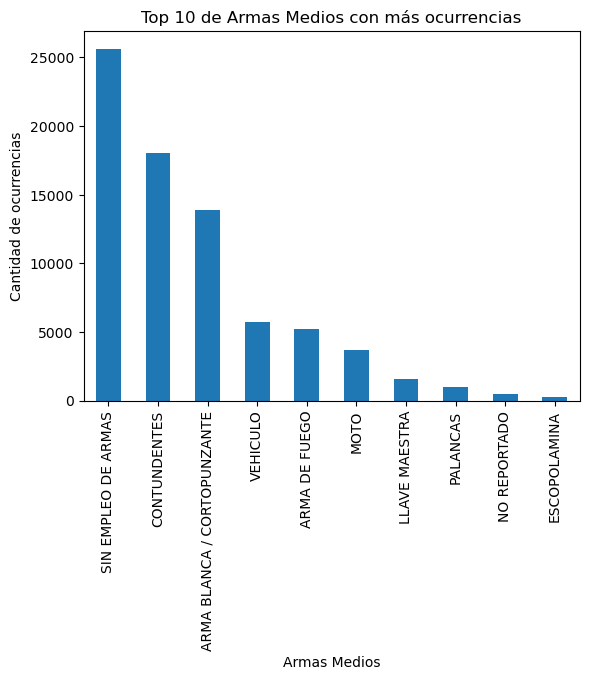

In [19]:
top_10_armas_medios = armas_count.head(10)
# Mediante un conteo, se pudo analizar que el arma/medios mas utilizado es "SIN EMPLEO DE ARMAS"
# se utilizo solo un top 10, para mostrar las armas/medios mas importantes.
top_10_armas_medios.plot(kind='bar')
plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Armas Medios con más ocurrencias')
plt.xticks(rotation=90)

plt.show()

**Groupby de  Barrios y Armas/medios**

- Se puede visualizar que armas son las más utilizadas según barrio.

In [20]:
df.groupby('BARRIOS_HECHO')[['ARMAS_MEDIOS']].sum()

,ARMAS_MEDIOS
BARRIOS_HECHO,
12 DE OCTUBRE,CONTUNDENTESARMA BLANCA / CORTOPUNZANTECONTUND...
13 DE JUNIO,MOTOMOTOARMA BLANCA / CORTOPUNZANTEVEHICULOSIN...
20 DE JULIO,CONTUNDENTESARMA DE FUEGOARMA BLANCA / CORTOPU...
23 DE JUNIO,CONTUNDENTESCONTUNDENTESARMA BLANCA / CORTOPUN...
5 DE ENERO,CONTUNDENTESARMA BLANCA / CORTOPUNZANTEARMA BL...
...,...
centro,SIN EMPLEO DE ARMASMOTOCONTUNDENTESCONTUNDENTE...
chapinero,SIN EMPLEO DE ARMAS
la victoria,CONTUNDENTES


**Se grafican juntos los top 10 de armas/medios y Barrios**

- Se realiza un gráfico visualizando un top 10 las armas mas utilizadas y barrios con mayor ocurrencia de delitos.

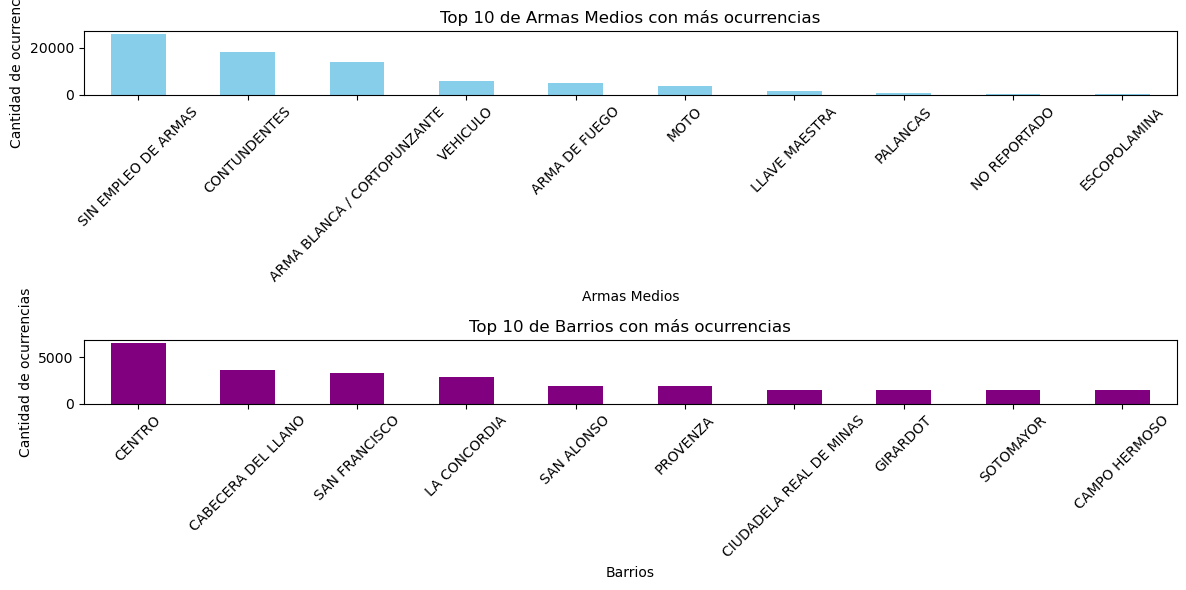

In [21]:
top_10_armas_medios = armas_count.head(10)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
top_10_armas_medios.plot(kind='bar', color='skyblue')
plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Armas Medios con más ocurrencias')
plt.xticks(rotation=45)

top_10_barrios = barrios_count.head(10)

plt.subplot(2, 1, 2)
top_10_barrios.plot(kind='bar', color='purple')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Barrios con más ocurrencias')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Top 3 de armas/medios utilizadas por top 3 de barrios con más delitos**

- Se puede visualizar que armas son las más utilizadas en el top 3 barrios con mayores delitos

In [22]:
conteo_armas = df['ARMAS_MEDIOS'].value_counts()
conteo_barrios = df['BARRIOS_HECHO'].value_counts()
top_armas = conteo_armas.nlargest(3).index
top_barrios = conteo_barrios.nlargest(3).index
df_filtrado = df[(df['ARMAS_MEDIOS'].isin(top_armas)) & (df['BARRIOS_HECHO'].isin(top_barrios))]
grupo = df_filtrado.groupby(['ARMAS_MEDIOS', 'BARRIOS_HECHO']).size().unstack(fill_value=0)

print(grupo)

BARRIOS_HECHO                CABECERA DEL LLANO  CENTRO  SAN FRANCISCO
ARMAS_MEDIOS                                                          
ARMA BLANCA / CORTOPUNZANTE                 575    1022            531
CONTUNDENTES                                605    1082            621
SIN EMPLEO DE ARMAS                        1793    3413           1194


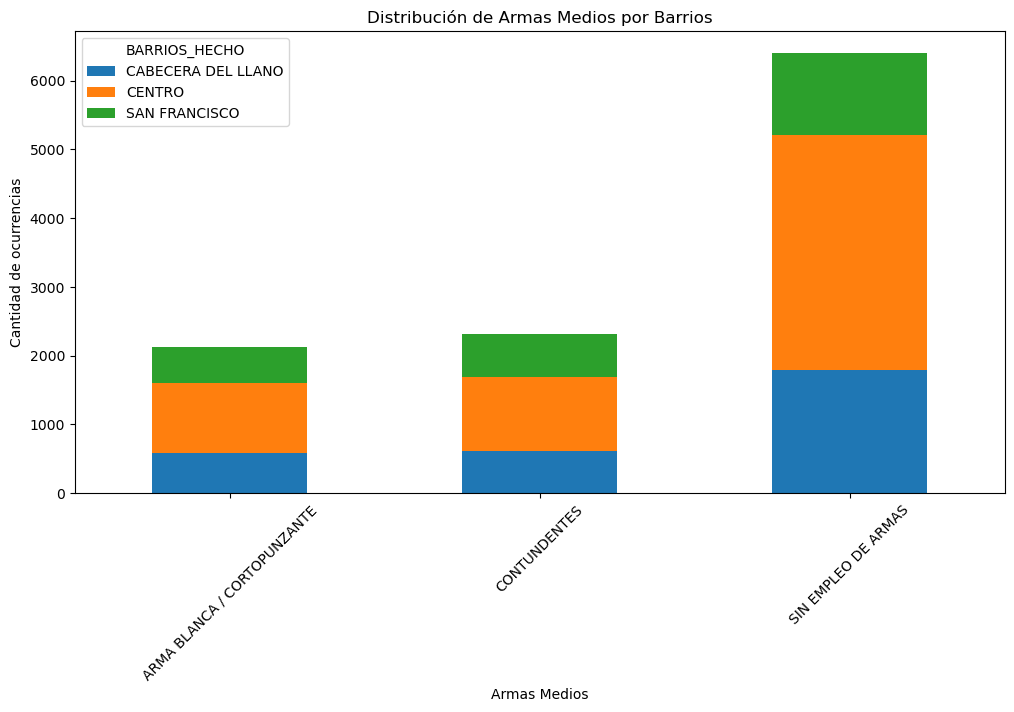

In [23]:
grupo.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Distribución de Armas Medios por Barrios')
plt.xticks(rotation=45)

plt.show()

# Se realizó un top 3 con la mayor cantidad de armas/objetos utilizados en los barrios mas afectado
# mediante este resultado, obtuvimos un grafico combinado que indica de forma sencilla la cantidad
# de delitos por barrio con su objeto cometido. Como resultado se obtuvo que la mayoria de los delitos
# se realizo sin empleo de armas en el barrio "Centro".

- ### 3)¿Qué tipo de clasificación del delito prevalece?

- Se observa que la mayoría de los delitos terminan en lesiones no fatales

**Se realiza un conteo de "clasificaciones delito"**

In [26]:
lesiones_count = df['CLASIFICACIONES_DELITO'].value_counts()
print(lesiones_count)

Lesiones no fatales    75154
Lesiones fatales         945
Name: CLASIFICACIONES_DELITO, dtype: int64


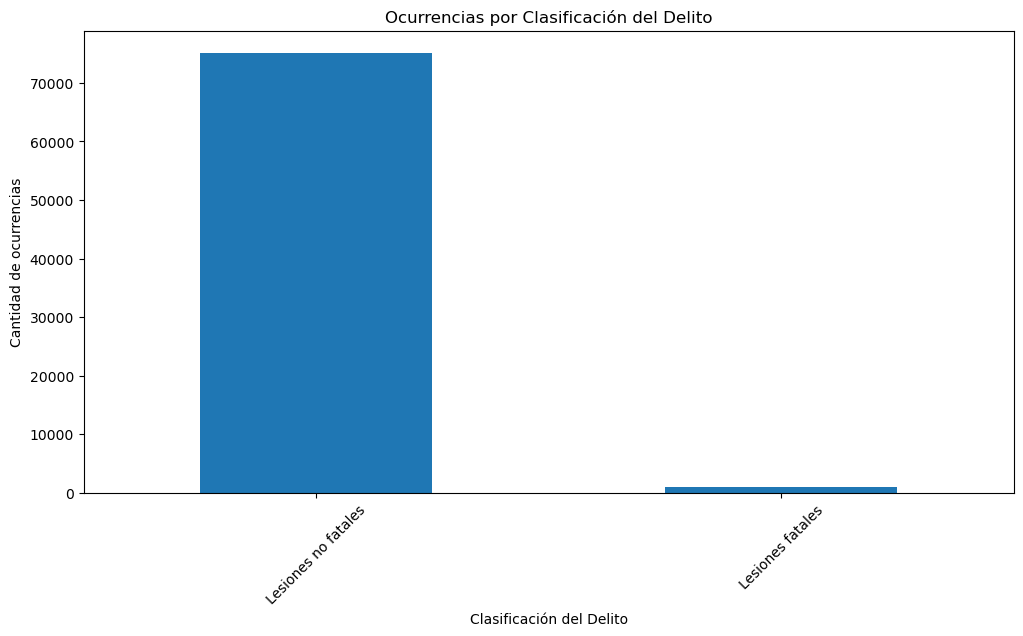

In [27]:
plt.figure(figsize=(12, 6))
lesiones_count.plot(kind='bar') 
plt.xlabel('Clasificación del Delito')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Ocurrencias por Clasificación del Delito')
plt.xticks(rotation=45)

plt.show()


- ### 4)¿Han crecido los delitos en el barrio Centro a través de los años?

- Se visualiza una caída de los hechos delictivos en el 2020, con un pico importante de aumento
en el 2021 (cabe recordar que se estaba cursando una etapa de Covid19 en el mundo y pudo
haber impactado en el cometimiento de delitos)
- Se puede observar que en el mes de diciembre aumentan significativamente los delitos

**Se utilizarán las variables "ANO" y "BARRIOS_HECHO" filtrando solamente el barrio "CENTRO" para verificar si se han incrementado los delitos en el mismo**

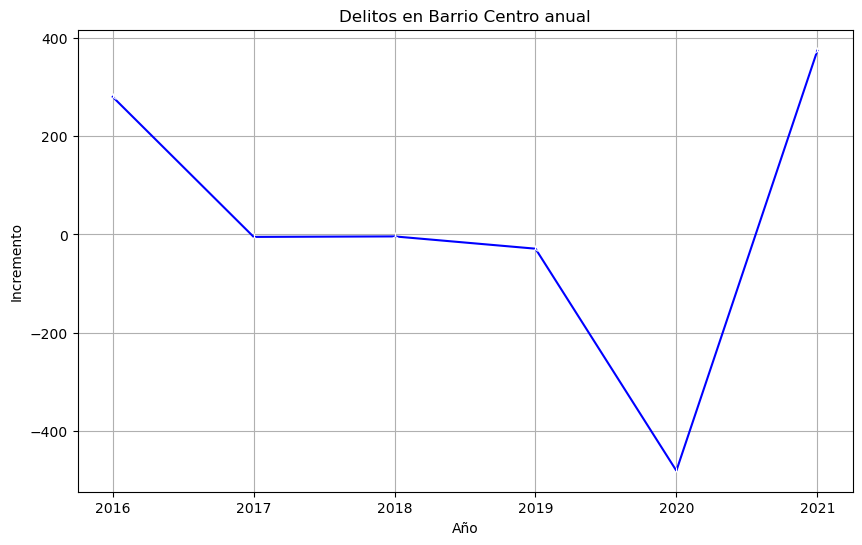

In [33]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']
df_centro = df_centro.groupby('ANIO').size().reset_index(name='Conteo')
df_centro['Incremento'] = df_centro['Conteo'].diff()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_centro, x='ANIO', y='Incremento', marker='2', color='blue')
plt.title('Delitos en Barrio Centro anual')
plt.xlabel('Año')
plt.ylabel('Incremento')
plt.grid(True)

plt.show()


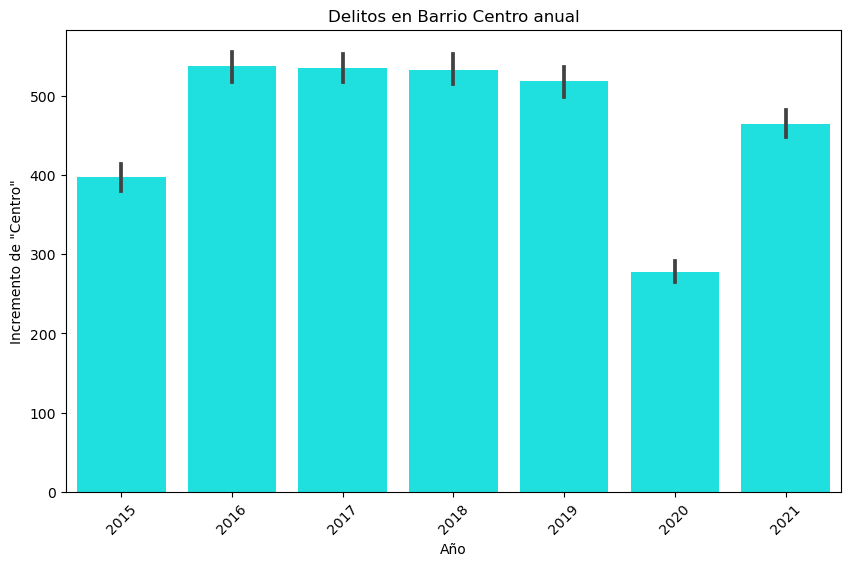

In [34]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']

df_centro = df_centro.sort_values(by='ANIO')
df_centro['Incremento'] = df_centro.groupby('ANIO').cumcount()
plt.figure(figsize=(10, 6))
sns.barplot(x='ANIO', y='Incremento', data=df_centro, color='cyan')
plt.title('Delitos en Barrio Centro anual')
plt.xlabel('Año')
plt.ylabel('Incremento de "Centro"')
plt.xticks(rotation=45)
plt.show()

**Se verifican los delitos en Barrio "CENTRO" para ver en que mes son más frecuentes**

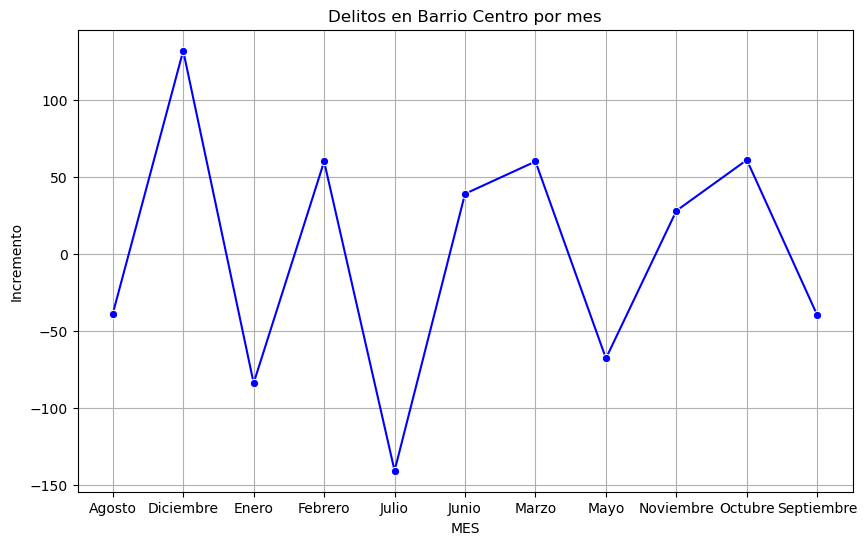

In [35]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']
df_centro = df_centro.groupby('MES').size().reset_index(name='Conteo')
df_centro['Incremento'] = df_centro['Conteo'].diff()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_centro, x='MES', y='Incremento', marker='o', color='blue')
plt.title('Delitos en Barrio Centro por mes')
plt.xlabel('MES')
plt.ylabel('Incremento')
plt.grid(True)

plt.show()

- ### 5)¿En que etapa de curso de vida son más frecuentes las lesiones fatales?

- Las lesiones fatales aumentan en la adolescencia y son significativamente mayores en la
etapa de Curso de vida de los Jóvenes.

**Se realiza un grafico lineplot utizando "Lesiones fatales" de la variable "CLASIFICACIONES DELITO" por la variable "CURSO_DE_VIDA"**

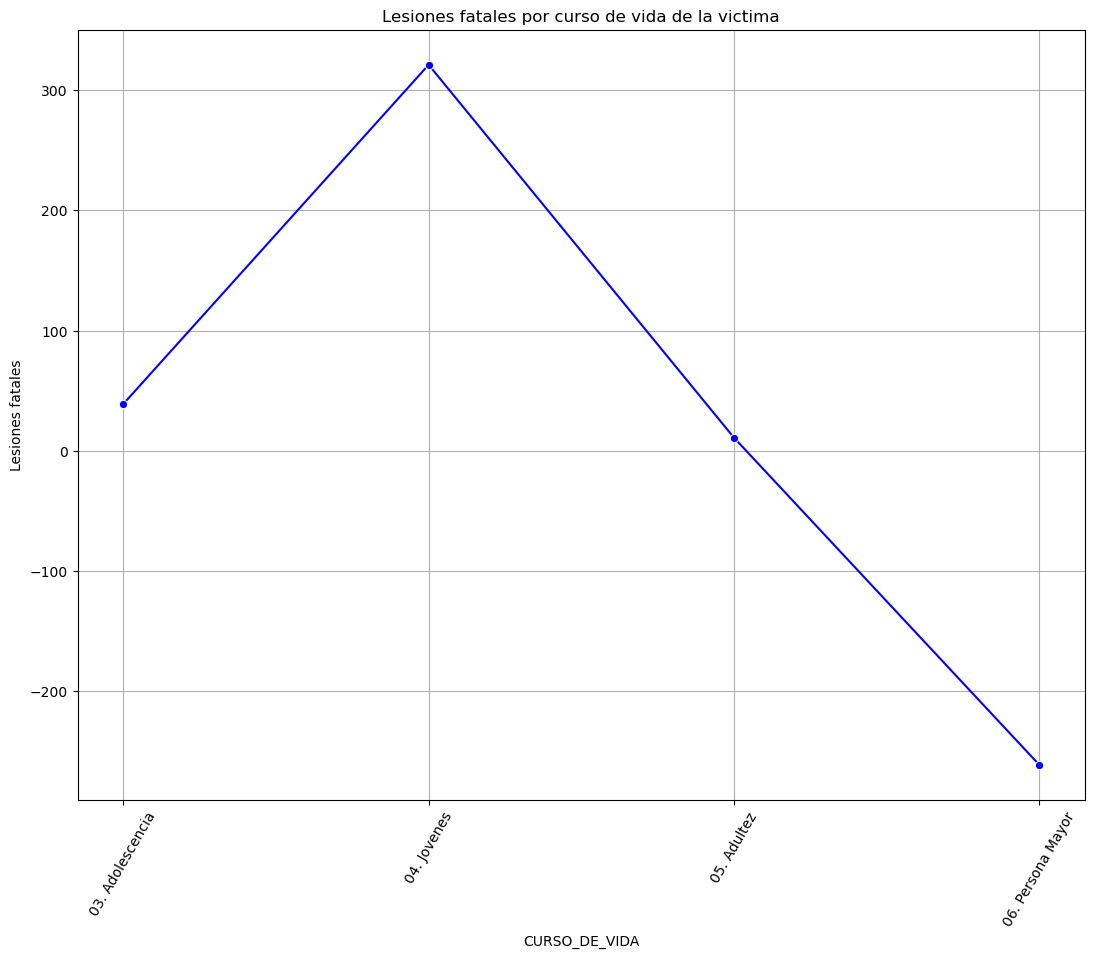

In [36]:
lesfatales = df[df['CLASIFICACIONES_DELITO'] == 'Lesiones fatales']
lesfatales = lesfatales.groupby('CURSO_DE_VIDA').size().reset_index(name='Conteo')
lesfatales['lesfatal'] = lesfatales['Conteo'].diff()
plt.figure(figsize=(13, 10))
sns.lineplot(data=lesfatales, x='CURSO_DE_VIDA', y='lesfatal', marker='o', color='blue')
plt.title('Lesiones fatales por curso de vida de la victima')
plt.xlabel('CURSO_DE_VIDA')
plt.ylabel('Lesiones fatales')
plt.xticks(rotation=60)
plt.grid(True)

plt.show()

- ### 6) ¿Hay alguna relación que refiera al curso de vida de las victimas?

- Se observa en la matriz de corelación que las variables mas relacionadas a "CURSO_DE_VIDA" son "EDAD", " DESCRIPCION_CONDUCTA" y "GENERO"

**Se realiza una matriz de correlación para averiguar una relación entre variables**

In [37]:
df2 = df.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()
#se transformó variables categóricas en numéricas

In [40]:
df2['ARMAS_MEDIOS'] = label_encoder.fit_transform(df2['ARMAS_MEDIOS'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['ZONA'] = label_encoder.fit_transform(df2['ZONA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['MES'] = label_encoder.fit_transform(df2['MES'])
df2['DIA_SEMANA'] = label_encoder.fit_transform(df2['DIA_SEMANA'])
df2['DESCRIPCION_CONDUCTA'] = label_encoder.fit_transform(df2['DESCRIPCION_CONDUCTA'])
df2['CONDUCTA'] = label_encoder.fit_transform(df2['CONDUCTA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['CLASIFICACIONES_DELITO'] = label_encoder.fit_transform(df2['CLASIFICACIONES_DELITO'])
df2['CURSO_DE_VIDA'] = label_encoder.fit_transform(df2['CURSO_DE_VIDA'])
df2['ESTADO_CIVIL_PERSONA'] = label_encoder.fit_transform(df2['ESTADO_CIVIL_PERSONA'])
df2['GENERO'] = label_encoder.fit_transform(df2['GENERO'])
df2['MOVIL_AGRESOR'] = label_encoder.fit_transform(df2['MOVIL_AGRESOR'])
df2['MOVIL_VICTIMA'] = label_encoder.fit_transform(df2['MOVIL_VICTIMA'])

In [41]:
df2. head()

,ARMAS_MEDIOS,BARRIOS_HECHO,ZONA,NOM_COMUNA,ANIO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES_DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,3,172,2,0,2015,3,1,3,1,2,0,28,3,5,1,0,0
1,3,55,2,11,2015,3,1,3,4,16,1,40,4,4,1,0,0
2,3,431,2,1,2015,3,1,3,4,16,1,18,3,4,1,0,0
3,3,441,2,0,2015,3,1,3,4,16,1,37,4,5,0,0,0
4,3,134,2,3,2015,3,1,3,15,9,1,18,3,4,1,0,0


**Realizo una  matriz de correlación que muestra cómo las variables se correlacionan entre sí.**

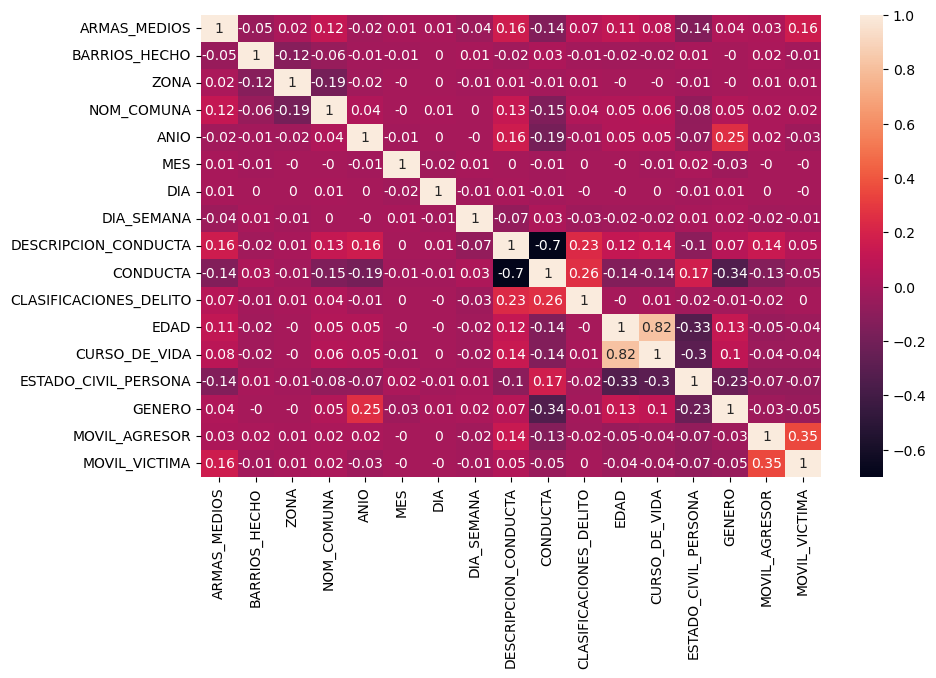

In [42]:
correlation_matrix = df2.corr(numeric_only=True).round(2)
correlation_matrix

plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

- Utilizaremos la variable "GENERO"

Text(0, 0.5, 'CURSO DE VIDA')

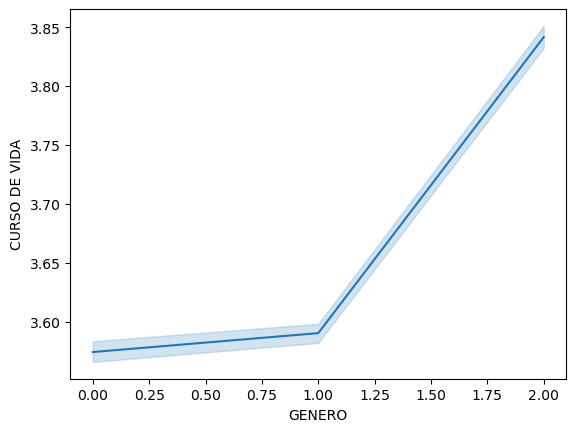

In [43]:
may_flights = df2
sns.lineplot(data=df2, x="GENERO", y="CURSO_DE_VIDA")
plt.xlabel('GENERO')
plt.ylabel('CURSO DE VIDA')

## Insights y Recomendaciones
**Mediante el análisis realizado se pudo observar lo siguiente:**

- Los barrios con más delitos son Centro,Cabecera del LLano y San Francisco.

- La mayoría de los delitos son sin empleo de armas, contundentes y arma blanca/ corto punzantes.

- Se observa que en el Top 3 de barrios con más delitos la mayoría se cometieron sin empleo de armas.

- La mayoría de los delitos culminan en lesiones no fatales.

- Se verificó que en el año 2020 en el curso de la cuarentena por la pandemia por Covid 19, los hechos cayeron, y se incrementaron abruptamente en el año 2021 en el Barrio Centro, cuando entre los años 2016/2019 se mantenenían practicamente sus valores, y el más bajo (exceptuando el 2020) fue en el año 2015.

- De los hechos delictivos en el barrio Centro los más frecuentes ocurren en el mes de diciembre.

- En cuanto a las lesiones fatales, efectivamente están relacionadas al curso de vida de la victima, los jovenes son los que más lesiones fatales sufren en los hechos.

- Se observa que los delincuentes tienden a elegir victimas mujeres dependiendo del curso de vida de la victima.

## Recomendaciones:
- Se recomendaría extremar las meddas de seguridad no solamente en el barrio "Centro", sino también en "Cabecera del LLano" y "San Francisco".

- Concientizar a los jóvenes y sobre todo mujeres a extremar medidas de seguridad.

- Aumentar vigilancia y patrullaje en el mes de diciembre.

- Como la mayoría de lesiones sin empleo de armas, contundentes y con armas blancas, se recomienda a las autoridades de salud poseer la capacidad hospitalaria para cubrir estas necesidades, no solo por lesiones de armas, sino también con apoyo psicológico.

- Capacitar al personal de seguridad para combatir diversos delitos sin armas, objetos contudentes, y corto/punzantes.

- ### Para responder el PROBLEMA COMERCIAL (*Para poder tomar intervención correctamente y poder evaluar programas de seguridad que impliquen acciones preventivas necesita saber que personas son más vulnerables ante hechos delictivos (si son jovenes, adultos, mayores, infantes)) se intentará predecir la variable objetivo CURSO_DE_VIDA.

## Se utiliza un Wrapper Methods feature_selection

In [44]:
scaler = RobustScaler()

In [45]:
df2_scaled = scaler.fit_transform(df2)

In [46]:
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [47]:
df3 = df2.copy()

In [48]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

**Se utiliza la variable "CURSO_DE_VIDA" como variable objetivo**

In [49]:
X = df3.drop("CURSO_DE_VIDA", 1)      
y = df3['CURSO_DE_VIDA']

C:\Users\Mariano\AppData\Local\Temp\ipykernel_16412\2881865997.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df3.drop("CURSO_DE_VIDA", 1)


In [50]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [51]:
sfs.fit(X, y)
sfs.k_feature_names_ 
#se determina que las siguientes variables proporcionarán un mejor rendimiento apara predecir la variable objetivo

('ARMAS_MEDIOS',
 'NOM_COMUNA',
 'MES',
 'DIA_SEMANA',
 'DESCRIPCION_CONDUCTA',
 'CONDUCTA',
 'EDAD',
 'ESTADO_CIVIL_PERSONA',
 'GENERO',
 'MOVIL_AGRESOR',
 'MOVIL_VICTIMA')

**Se utilizan las variables dadas**

In [52]:
 X = df3[['ARMAS_MEDIOS',
 'BARRIOS_HECHO',
 'ZONA',
 'NOM_COMUNA',
 'ANIO',
 'MES',
 'DESCRIPCION_CONDUCTA',
 'CONDUCTA',
 'EDAD',
 'ESTADO_CIVIL_PERSONA',
 'GENERO']]         
y = df3['CURSO_DE_VIDA']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Se utiliza RandomForestClassifier con la variable "curso_de_vida"

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [55]:
y_pred= clf.predict(X_test)

In [56]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00       611
           3       0.86      1.00      0.93      4930
           4       0.91      1.00      0.95      8635
           5       0.00      0.00      0.00       858

    accuracy                           0.89     15220
   macro avg       0.30      0.33      0.31     15220
weighted avg       0.79      0.89      0.84     15220



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Se utiliza otro método para seleccionar las variables, por correlación**

**Se realiza un TOP 5 de variables con más correlación a la variable objetivo a predecir: CURSO_DE_VIDA** 

In [57]:
correlation_matrix = df2.corr()
correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['CURSO_DE_VIDA'].abs().sort_values(ascending=False)
positive_correlations = correlation_with_target[correlation_with_target > 0]
top_5_correlations = positive_correlations[1:6]
print(top_5_correlations)

EDAD                    0.817751
ESTADO_CIVIL_PERSONA    0.296010
CONDUCTA                0.141208
DESCRIPCION_CONDUCTA    0.138682
GENERO                  0.100626
Name: CURSO_DE_VIDA, dtype: float64


In [58]:
scaler = RobustScaler()

In [59]:
df2_scaled = scaler.fit_transform(df2)

In [60]:
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [61]:
df4 = df2.copy()

In [62]:
X = df4[['EDAD',
 'ESTADO_CIVIL_PERSONA',
 'CONDUCTA',
 'DESCRIPCION_CONDUCTA',
 'GENERO']]         
y = df4['CURSO_DE_VIDA']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       608
           3       1.00      1.00      1.00      4887
           4       1.00      1.00      1.00      8643
           5       1.00      1.00      1.00       900

    accuracy                           1.00     15220
   macro avg       1.00      1.00      1.00     15220
weighted avg       1.00      1.00      1.00     15220



**Se puede observar un precisión perfecta, por lo cual da a entender que los modelos se ajustan excesivamente a los datos de entrenamiento.  (Overfitting)**

### DecisionTreeClassifier  con hiperparámetros

In [67]:
hyperparameters = {
    'criterion': 'gini',
    'max_depth': 1,
    'min_samples_split': 7,
    'min_samples_leaf': 5,
    'max_features': None}

classifier = DecisionTreeClassifier(**hyperparameters)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8889618922470434
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00       608
           3       0.86      1.00      0.93      4887
           4       0.91      1.00      0.95      8643
           5       0.00      0.00      0.00       900

    accuracy                           0.89     15220
   macro avg       0.29      0.33      0.31     15220
weighted avg       0.79      0.89      0.84     15220



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Se puede observar un mejor rendimiento a la hora de aplicar hiperparámetros.